In [1]:
import pandas as pd

In [2]:
df_routes = pd.read_csv('route_categories.csv', index_col=0)

In [3]:
df_routes.head()

,time,hour,Alcalde,Avila_Camacho,Enrique_Diaz_de_Leon,Federalismo,Hidalgo,Independencia,Juarez,Lazaro_Cardenas,Lopez_Mateos,Vallarta,origin,destination,Ruta
0,2019-05-03 5:44:21,5,0,0,0,0,0,0,0,0,0,0,Hospicio Cabañas,Plaza Galerías,L3_629-1
1,2019-05-03 5:44:21,5,0,0,0,0,0,0,0,0,0,0,Hospicio Cabañas,Andares,L3_710
2,2019-05-03 5:44:21,5,0,0,0,0,0,0,0,0,0,0,Hospicio Cabañas,Secretaría de Movilidad,L3_LT1
3,2019-05-03 5:44:21,5,0,0,0,0,0,0,0,0,0,0,Hospicio Cabañas,La Minerva,258
4,2019-05-03 5:44:21,5,0,0,0,0,0,0,0,0,0,0,Hospicio Cabañas,Basílica de Zapopan,258_24


In [4]:
df_routes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 0 to 509
Data columns (total 15 columns):
time                    510 non-null object
hour                    510 non-null int64
Alcalde                 510 non-null int64
Avila_Camacho           510 non-null int64
Enrique_Diaz_de_Leon    510 non-null int64
Federalismo             510 non-null int64
Hidalgo                 510 non-null int64
Independencia           510 non-null int64
Juarez                  510 non-null int64
Lazaro_Cardenas         510 non-null int64
Lopez_Mateos            510 non-null int64
Vallarta                510 non-null int64
origin                  510 non-null object
destination             510 non-null object
Ruta                    510 non-null object
dtypes: int64(11), object(4)
memory usage: 63.8+ KB


In [5]:
df_routes.time = pd.to_datetime(df_routes.time, format='%Y-%m-%d')
df_routes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 0 to 509
Data columns (total 15 columns):
time                    510 non-null datetime64[ns]
hour                    510 non-null int64
Alcalde                 510 non-null int64
Avila_Camacho           510 non-null int64
Enrique_Diaz_de_Leon    510 non-null int64
Federalismo             510 non-null int64
Hidalgo                 510 non-null int64
Independencia           510 non-null int64
Juarez                  510 non-null int64
Lazaro_Cardenas         510 non-null int64
Lopez_Mateos            510 non-null int64
Vallarta                510 non-null int64
origin                  510 non-null object
destination             510 non-null object
Ruta                    510 non-null object
dtypes: datetime64[ns](1), int64(11), object(3)
memory usage: 63.8+ KB


## ML Desicion Tree

In [6]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix

In [7]:
df_traffic_dummies = pd.get_dummies(df_routes.iloc[:,2:14])
df_traffic_dummies.head()

,Alcalde,Avila_Camacho,Enrique_Diaz_de_Leon,Federalismo,Hidalgo,Independencia,Juarez,Lazaro_Cardenas,Lopez_Mateos,Vallarta,...,origin_Hospicio Cabañas,origin_La Minerva,origin_Plaza Galerías,origin_Secretaría de Movilidad,destination_Andares,destination_Basílica de Zapopan,destination_Hospicio Cabañas,destination_La Minerva,destination_Plaza Galerías,destination_Secretaría de Movilidad
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [8]:
X = df_traffic_dummies
y = df_routes[df_routes.columns[14:15]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [9]:
random_forest = RandomForestClassifier(criterion='entropy', n_estimators=1000)

y_pred = random_forest.fit(X_train, y_train.values.ravel()).predict(X_test)

score = random_forest.score(X_test, y_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
print("Score: %f"%(score))
print(cnf_matrix)   

Score: 0.852941
[[5 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


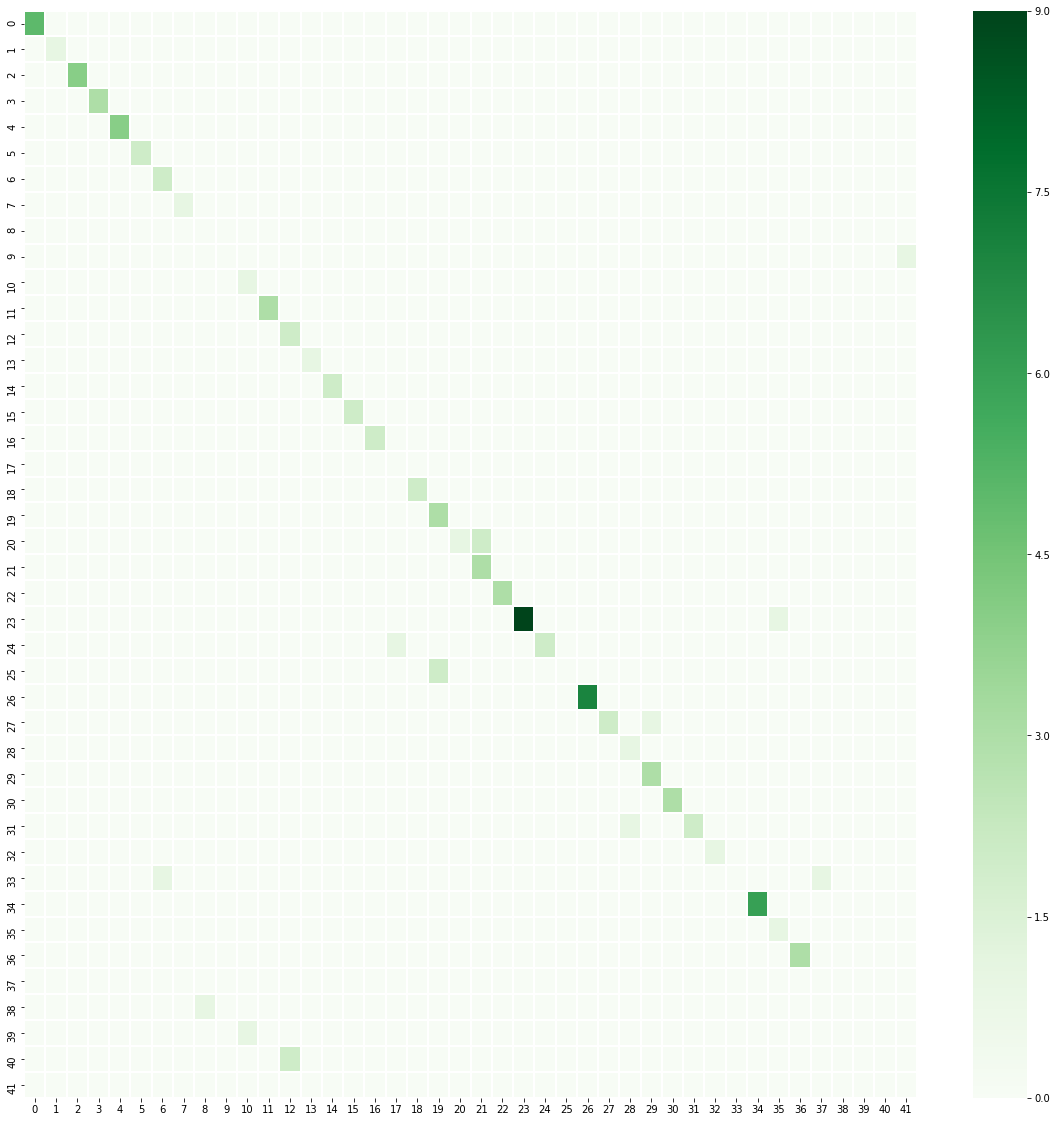

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axis = plt.subplots(figsize=(20, 20))
sns.heatmap(cnf_matrix, ax=axis, annot=False, linewidths=1, cmap='Greens')